In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import  classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

In [155]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/root2ai/root2ai - Data.csv')

In [156]:
df.head(5)

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain


**Checking null values**

In [157]:
#Checking the number of null rows
df.isnull().sum()

Text      3
Target    0
dtype: int64

In [158]:
#Dropping the null values
df.dropna(inplace=True)

**Splittting the data for training and testing**

In [159]:
X=df.drop(columns='Target')
y=df['Target']

In [160]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=32)

In [161]:
print(f'The size of X_train is {X_train.shape}')
print(f'The size of X_test is {X_test.shape}')

The size of X_train is (18160, 1)
The size of X_test is (4541, 1)


**EDA**

In [162]:
#Analysing the target column
y_train.value_counts()

FinTech             6810
Cyber Security      2100
Bigdata             1790
Reg Tech            1775
credit reporting    1402
Blockchain          1093
Neobanks             878
Microservices        779
Stock Trading        644
Robo Advising        618
Data Security        271
Name: Target, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Target attributes')

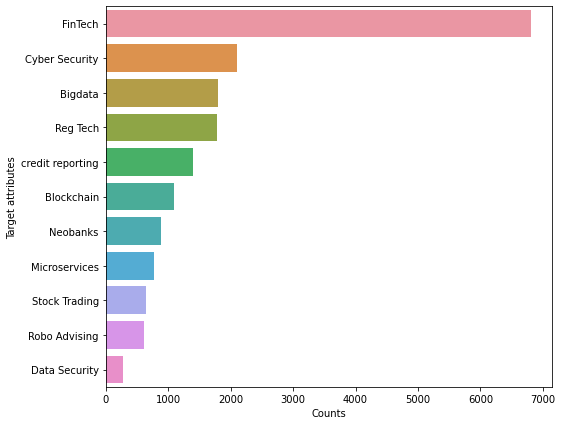

In [163]:
# Visualizing the target column
X_visu=y_train.value_counts().values
y_visu=y_train.value_counts().index
plt.figure(figsize=(8,7))
sns.barplot(X_visu,y_visu)
plt.xlabel('Counts')
plt.ylabel('Target attributes')

Analysing the text

In [164]:
counter=0
how_many=5
for i in X_train['Text']:
  if counter<=how_many:
    print(f'{counter} {i}')
  else:
    break
  counter+=1

0 proximity creation provide important focus community
1 While alike exactly architecture conventionally thought structure system comprise externally visible among
2 With past trend unlikely lose popularity soon
3 course difficult foresee large tech credit become future
4 last went gold silver bank subsequently paper currency
5 mobile kiosk digital need agility exploit quickly cost effectively


Looking at the text data we can see that it is clean without any punctuations or any other symbol.So we just need to remove the stop words

**Vectorizing the text**

In [165]:
# Using tfidf for text vectorizing
vectorizer=TfidfVectorizer(stop_words='english',ngram_range=(1,2))
vectorized_train=vectorizer.fit_transform(X_train['Text'])
vectorized_test=vectorizer.transform(X_test['Text'])

In [166]:
#First 10 feature names
# It can be seen that we have taken both uni-gram and bi-gram 
print(f'The first 5 feature names are :- {vectorizer.get_feature_names()[0:10]}')

The first 5 feature names are :- ['abaker', 'abaker yaqoob', 'abandon', 'abandon basket', 'abandon interactions', 'abandoned', 'abandoned horse', 'abandoned keen', 'abandoned shopping', 'abandonment']


(-0.5, 399.5, 199.5, -0.5)

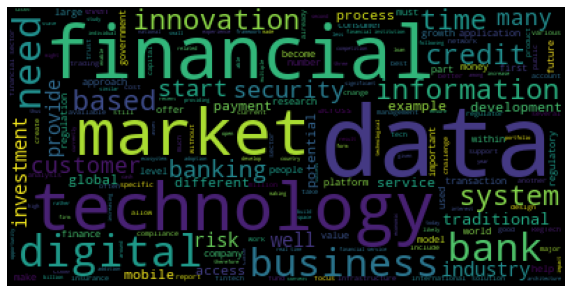

In [167]:
# Lets check which are the most repetative words
all_join=''
for i in X['Text']:
  all_join=all_join+i+' '
from wordcloud import WordCloud
plt.figure(figsize=(10,8))
wc=WordCloud(background_color='black')
wc.generate(all_join)
plt.imshow(wc)
plt.axis('off')

**MultiNomial Naive bayes**

In [168]:
model=MultinomialNB(alpha=0.005)
model.fit(vectorized_train,y_train)

MultinomialNB(alpha=0.005, class_prior=None, fit_prior=True)

In [169]:
#Making predictions
pred=model.predict(vectorized_test)
pred_train=model.predict(vectorized_train)

**Model Evaluation**

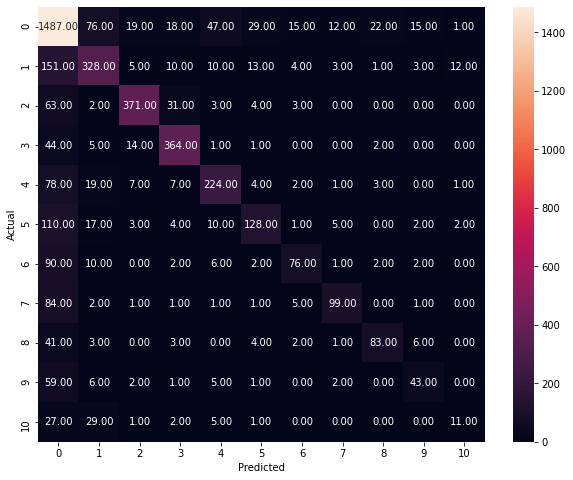

In [170]:
#Plotting COnfusion matrix
def cf_matrix(y_test,pred):
  cf=confusion_matrix(y_test,pred,labels=y_train.value_counts().index)
  plt.figure(figsize=(10,8))
  sns.heatmap(cf,annot=True,fmt='.2f')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')

cf_matrix(y_test,pred)

In [171]:
print(f'The train accuracy is :- {accuracy_score(y_train,pred_train)}')
print(f'The test accuracy is :- {accuracy_score(y_test,pred)}')

The train accuracy is :- 0.9774229074889867
The test accuracy is :- 0.7077736181457829


In [172]:
#Classification report
def eval_report(y_test,pred):
  print(classification_report(y_test,pred))

eval_report(y_test,pred)

                  precision    recall  f1-score   support

         Bigdata       0.88      0.78      0.82       477
      Blockchain       0.68      0.45      0.54       282
  Cyber Security       0.66      0.61      0.63       540
   Data Security       0.41      0.14      0.21        76
         FinTech       0.67      0.85      0.75      1741
   Microservices       0.80      0.51      0.62       195
        Neobanks       0.70      0.40      0.51       191
        Reg Tech       0.82      0.84      0.83       431
   Robo Advising       0.60      0.36      0.45       119
   Stock Trading       0.73      0.58      0.65       143
credit reporting       0.72      0.65      0.68       346

        accuracy                           0.71      4541
       macro avg       0.70      0.56      0.61      4541
    weighted avg       0.71      0.71      0.70      4541



**Feature Engineering**

In [173]:
#Repeatation of words
import re
repeat=[]
for i in df['Text']:
  words_split=re.split(' ',string=i)
  data=pd.DataFrame(words_split).value_counts().values
  repeat.append(data[0])

df['Repetition']=repeat

In [174]:
#Length of the sentence
sen_len=[]
for i in df['Text']:
  words_split=re.split(' ',string=i)
  sen_len.append(len(words_split))

df['Sentence_length']=sen_len

In [175]:
df.head(3)

,Text,Target,Repetition,Sentence_length
0,reserve bank forming expert committee based in...,Blockchain,2,19
1,director could play role financial system,Blockchain,1,6
2,preliminary discuss secure transaction study r...,Blockchain,1,7


**Repeating the above process for training and testing the new Data Frame**

In [176]:
#Train test split
X2=df.drop(columns='Target')
y2=df['Target']
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.2,random_state=32)

In [177]:
X_train2

,Text,Repetition,Sentence_length
11353,proximity creation provide important focus com...,1,6
17046,While alike exactly architecture conventionall...,1,12
17147,With past trend unlikely lose popularity soon,1,7
4433,course difficult foresee large tech credit bec...,1,8
7840,last went gold silver bank subsequently paper ...,1,8
...,...,...,...
19530,overall indicate disruptive effects financial,1,5
20417,instance according recent report Fidelity Nati...,1,13
9526,what past three,1,3
9771,several form electronic electronic money payment,2,6


In [178]:
# Vectorizing the words
vectorizer2=TfidfVectorizer(stop_words='english',ngram_range=(1,2))
vectorized_train_text=vectorizer2.fit_transform(X_train2['Text'])
vectorized_test_text=vectorizer2.transform(X_test2['Text'])

The Tfidf vectorizer outputs a sparse matrix so we need to make the other two columns (Repeatation and Sentence length) sparse and then stack them horizontally with the vectorized column and fetch it to the model

In [179]:
from scipy import sparse
#train
repeat_sparse=sparse.csc_matrix(X_train2['Repetition']).reshape(X_train2.shape[0],1)
len_sparse=sparse.csc_matrix(X_train2['Sentence_length']).reshape(X_train2.shape[0],1)
#test
repeat_sparse_ts=sparse.csc_matrix(X_test2['Repetition']).reshape(X_test2.shape[0],1)
len_sparse_ts=sparse.csc_matrix(X_test2['Sentence_length']).reshape(X_test2.shape[0],1)

In [180]:
#Horizontal stacking with the vectorized column
from scipy.sparse import hstack
X_train_final=hstack([vectorized_train_text,repeat_sparse,len_sparse])
X_test_final=hstack([vectorized_test_text,repeat_sparse_ts,len_sparse_ts])
print(f'The shape of X_train final is{X_train_final.shape}')

The shape of X_train final is(18160, 103997)


In [181]:
#testing model
model_ff=MultinomialNB(alpha=0.005)
model_ff.fit(X_train_final,y_train2)

MultinomialNB(alpha=0.005, class_prior=None, fit_prior=True)

In [182]:
#Making Predictions
pred_ff=model_ff.predict(X_test_final)
pred_train_ff=model_ff.predict(X_train_final)

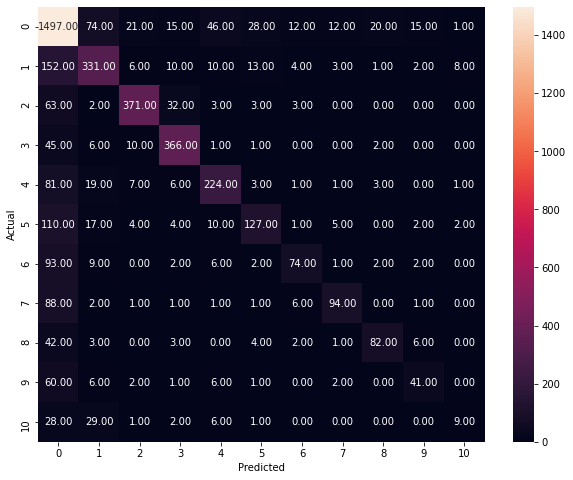

In [183]:
cf_matrix(y_test2,pred_ff)

In [184]:
eval_report(y_test2,pred_ff)

                  precision    recall  f1-score   support

         Bigdata       0.88      0.78      0.82       477
      Blockchain       0.69      0.45      0.55       282
  Cyber Security       0.66      0.61      0.64       540
   Data Security       0.43      0.12      0.19        76
         FinTech       0.66      0.86      0.75      1741
   Microservices       0.79      0.48      0.60       195
        Neobanks       0.72      0.39      0.50       191
        Reg Tech       0.83      0.85      0.84       431
   Robo Advising       0.59      0.34      0.44       119
   Stock Trading       0.75      0.57      0.65       143
credit reporting       0.72      0.65      0.68       346

        accuracy                           0.71      4541
       macro avg       0.70      0.55      0.60      4541
    weighted avg       0.71      0.71      0.70      4541



In [185]:
print(f'The train accuracy is :- {accuracy_score(y_train2,pred_train_ff)}')
print(f'The test accuracy is :- {accuracy_score(y_test2,pred_ff)}')

The train accuracy is :- 0.9773127753303965
The test accuracy is :- 0.7082140497687734


Conclusion :- The feature we created didn't helped that much but still something is better than nothing.

<center><h1> Thank You <h1></center>